In [4]:
%load_ext autoreload
%autoreload 2 
import sys
sys.path.append("../../../xapres/")
import xapres as xa
import matplotlib.pyplot as plt
import numpy as np
import xarray as xr
sys.path.append("/Users/jkingslake/Documents/science/ApRES/bas-apres")
import apres as ap
#from apres import ApRESFile

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [10]:
%%timeit
dat_file = '../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'
burstnum=0
with ap.ApRESFile(dat_file) as f: 
    for burst in f.read():
        header = burst.header
        data = burst.data
        #print(f'data: len(data) = {len(data)}')
        #print(f'data: data.size = {data.size}')
        #print(f'data: data.shape = {data.shape}')
        burstnum+=1
        #print(f'burstnum = {burstnum}')


7.33 ms ± 370 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [13]:
dat_file = '../../data/sample/thwaites/DATA2023-02-12-0437.DAT'

with ap.ApRESFile(dat_file) as f: 
    f.read()

In [ ]:
xapres_Loaded = xa.load.generate_xarray('../../data/sample/multi-burst-dat-file/', computeProfiles=False)

  0%|          | 0/1 [00:00<?, ?it/s]


AttributeError: 'ApRESBurst' object has no attribute 'BurstNo'

In [113]:
# extract filename from path
import os
filename = os.path.basename(f.path)

filename

'DATA2022-05-22-1939.DAT'

In [116]:
f.bursts[0].header

{'Time stamp': '2022-05-22 19:40:20',
 'RMB_Issue': '2c',
 'VAB_Issue': 'C',
 'SW_Issue': array(103.1),
 'Venom_Issue': array(20180522.),
 'Alternate': array(0.),
 'MonoTx': array(1.),
 'MonoRx': array(1.),
 'NSubBursts': array(20.),
 'NData': array(0.),
 'NSAFData': array(0.),
 'Triples': '0,0,0,0,0,0,0,0,0,0,0,0',
 'Average': array(0.),
 'RepSecs': array(900.),
 'CheckEthernet': array(1.),
 'N_ADC_SAMPLES': array(40001.),
 'MAX_DATA_FILE_LENGTH': array(3.e+08),
 'MAX_SAF_FILE_LENGTH': array(0.),
 'ANTENNA_SELECT': array(0.),
 'nAttenuators': array(2.),
 'Housekeeping': array(1.),
 'GPSon': array(60.),
 'SyncGPS': array(1.),
 'Iridium': array(0.),
 'WATCHDOG_TASK_SECS': array(3600.),
 'IntervalMode': array(0.),
 'InterChirpDelay': array(50.),
 'Attenuator1': '10,20,30,30',
 'AFGain': '-14,-14,-14,-14',
 'TxAnt': '1,0,0,0,0,0,0,0',
 'RxAnt': '1,0,0,0,0,0,0,0',
 'maxDepthToGraph': array(900.),
 'SleepMode': array(0.),
 'LogOn': array(1.),
 'Reg00': '"00000008"',
 'Reg01': '"000C0820"',


In [ ]:
def values_to_arrays(d):
    
    for key, value in d.items():
        if key in keys_to_skip:
            continue
        try:
            d[key] = np.fromstring(value, dtype='float64')
        except:
            try:    
                d[key] = np.fromstring(value, sep=',')
            except:
                pass
            pass
    return d

In [189]:
dat_file = '../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'

with ap.ApRESFile(dat_file) as f: 
    f.read()
    
for i, b in enumerate(f.bursts):
    f.bursts[i].header = values_to_arrays(b.header)

burst = f.bursts[0]
burst.header


/var/folders/kl/3mt9f4qs1559xwy3mr60s7980000gp/T/ipykernel_28211/2794982262.py:8: DeprecationWarning: The binary mode of fromstring is deprecated, as it behaves surprisingly on unicode inputs. Use frombuffer instead
  d[key] = np.fromstring(value, dtype='float64')
/var/folders/kl/3mt9f4qs1559xwy3mr60s7980000gp/T/ipykernel_28211/2794982262.py:11: DeprecationWarning: string or file could not be read to its end due to unmatched data; this will raise a ValueError in the future.
  d[key] = np.fromstring(value, sep=',')


{'Time stamp': '2022-05-22 19:40:20',
 'RMB_Issue': array([2.]),
 'VAB_Issue': array([], dtype=float64),
 'SW_Issue': array([103.1]),
 'Venom_Issue': array([6.75363614e-67]),
 'Alternate': array([0.]),
 'MonoTx': array([1.]),
 'MonoRx': array([1.]),
 'NSubBursts': array([20.]),
 'NData': array([0.]),
 'NSAFData': array([0.]),
 'Triples': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Average': array([0.]),
 'RepSecs': array([900.]),
 'CheckEthernet': array([1.]),
 'N_ADC_SAMPLES': array([40001.]),
 'MAX_DATA_FILE_LENGTH': array([3.e+08]),
 'MAX_SAF_FILE_LENGTH': array([0.]),
 'ANTENNA_SELECT': array([0.]),
 'nAttenuators': array([2.]),
 'Housekeeping': array([1.]),
 'GPSon': array([60.]),
 'SyncGPS': array([1.]),
 'Iridium': array([0.]),
 'WATCHDOG_TASK_SECS': array([3600.]),
 'IntervalMode': array([0.]),
 'InterChirpDelay': array([50.]),
 'Attenuator1': array([10., 20., 30., 30.]),
 'AFGain': array([-14., -14., -14., -14.]),
 'TxAnt': array([1., 0., 0., 0., 0., 0., 0., 0.]

In [147]:
f.bursts[[1,2,3]]

TypeError: list indices must be integers or slices, not list

In [ ]:
dt  = burst.header['TStepUp']
chirp_time = np.arange(burst.header["N_ADC_SAMPLES"]) * burst.header['TStepUp']


1.0

In [100]:

chirp_time.shape

(40001,)

In [101]:
burst.data.shape

(20, 40001, 2)

In [103]:
burst.header['NSubBursts']

array(20.)

In [121]:
# add singlton dim to chirps

chirps = burst.data[np.newaxis,]
chirps.shape

(1, 20, 40001, 2)

In [ ]:
np.fromstring(burst.header['AFGain'], sep=',')

array([-14., -14., -14., -14.])

In [141]:
burst.header['Attenuator1']

array([10., 20., 30., 30.])

In [171]:
burst.header

{'Time stamp': '2022-05-22 19:40:20',
 'RMB_Issue': array([2.]),
 'VAB_Issue': array([], dtype=float64),
 'SW_Issue': array(103.1),
 'Venom_Issue': array(20180522.),
 'Alternate': array(0.),
 'MonoTx': array(1.),
 'MonoRx': array(1.),
 'NSubBursts': array(20.),
 'NData': array(0.),
 'NSAFData': array(0.),
 'Triples': array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]),
 'Average': array(0.),
 'RepSecs': array(900.),
 'CheckEthernet': array(1.),
 'N_ADC_SAMPLES': array(40001.),
 'MAX_DATA_FILE_LENGTH': array(3.e+08),
 'MAX_SAF_FILE_LENGTH': array(0.),
 'ANTENNA_SELECT': array(0.),
 'nAttenuators': array(2.),
 'Housekeeping': array(1.),
 'GPSon': array(60.),
 'SyncGPS': array(1.),
 'Iridium': array(0.),
 'WATCHDOG_TASK_SECS': array(3600.),
 'IntervalMode': array(0.),
 'InterChirpDelay': array(50.),
 'Attenuator1': array([10., 20., 30., 30.]),
 'AFGain': array([-14., -14., -14., -14.]),
 'TxAnt': array([1., 0., 0., 0., 0., 0., 0., 0.]),
 'RxAnt': array([1., 0., 0., 0., 0., 0., 0., 0.]

In [173]:
import pandas as pd
pd.to_datetime(burst.header["Time stamp"])

Timestamp('2022-05-22 19:40:20')

In [145]:
orientation = 'NA'
time = 'NA'
BurstNo = 0
xarray_out = xr.Dataset(
                data_vars=dict(
                    chirp           = (["time", "chirp_num", "chirp_time", "attenuator_setting_pair"], burst.data[np.newaxis,]),
                    latitude        = (["time"], [burst.header['Latitude']]),
                    longitude       = (["time"], [burst.header['Longitude']]),  
                    battery_voltage = (["time"], [burst.header['BatteryVoltage']]), 
                    temperature_1   = (["time"], [burst.header['Temp1']]),
                    temperature_2   = (["time"], [burst.header['Temp2']])
                ),
                coords=dict( 
                    time                  = [time],
                    chirp_time            = chirp_time,
                    chirp_num             = np.arange(burst.header['NSubBursts']),
                    filename              = (["time"], [os.path.basename(f.path)]),
                    burst_number          = (["time"], [BurstNo]),
                    AFGain                = (["attenuator_setting_pair"], burst.header['AFGain'][0:int(burst.header['nAttenuators'])]),
                    attenuator            = (["attenuator_setting_pair"], burst.header['Attenuator1'][0:int(burst.header['nAttenuators'])]),                   
                    orientation           = (["time"], [orientation]),
                ),
            )
xarray_out

<xarray.Dataset>
Dimensions:          (time: 1, chirp_num: 20, chirp_time: 40001,
                      attenuator_setting_pair: 2)
Coordinates:
  * time             (time) <U2 'NA'
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * chirp_num        (chirp_num) float64 0.0 1.0 2.0 3.0 ... 16.0 17.0 18.0 19.0
    filename         (time) <U23 'DATA2022-05-22-1939.DAT'
    burst_number     (time) int64 0
    AFGain           (attenuator_setting_pair) float64 -14.0 -14.0
    attenuator       (attenuator_setting_pair) float64 10.0 20.0
    orientation      (time) <U2 'NA'
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_num, chirp_time, attenuator_setting_pair) uint16 ...
    latitude         (time) float64 69.22
    longitude        (time) float64 -51.12
    battery_voltage  (time) float64 12.33
    temperature_1    (time) float64 4.383
    temperature_2    (time) float64 5.195

In [ ]:
xarray_out = xr.Dataset(
                data_vars=dict(
                    chirp           = (["time","chirp_time", "chirp_num", "attenuator_setting_pair"], burst.data),
                    latitude        = (["time"], [burst.Header['Latitude']]),
                    longitude       = (["time"], [burst.Header['Longitude']]),  
                    battery_voltage = (["time"], [burst.Header['BatteryVoltage']]), 
                    temperature_1   = (["time"], [burst.Header['Temp1']]),
                    temperature_2   = (["time"], [burst.Header['Temp2']])
                ),
                coords=dict(    
                    time                  = [time],
                    chirp_time            = chirp_time,
                    chirp_num             = np.arange(burst.Header['NSubBursts']),
                    filename              = (["time"], [burst.Filename]),
                    burst_number          = (["time"], [burst.BurstNo]),
                    AFGain                = (["attenuator_setting_pair"], burst.Header['AFGain'][0:burst.Header['nAttenuators']]),
                    attenuator            = (["attenuator_setting_pair"], burst.Header['Attenuator1'][0:burst.Header['nAttenuators']]),
                    orientation           = (["time"], [orientation])
                ),
            )

In [158]:
bursts_to_process = [0, 1]


bursts = [f.bursts[burst_number] for burst_number in bursts_to_process]



list_of_singleBurst_xarrays = [
    xr.Dataset(
                data_vars=dict(
                    chirp           = (["time", "chirp_num", "chirp_time", "attenuator_setting_pair"], burst.data[np.newaxis,]),
                    latitude        = (["time"], [burst.header['Latitude']]),
                    longitude       = (["time"], [burst.header['Longitude']]),  
                    battery_voltage = (["time"], [burst.header['BatteryVoltage']]), 
                    temperature_1   = (["time"], [burst.header['Temp1']]),
                    temperature_2   = (["time"], [burst.header['Temp2']])
                ),
                coords=dict( 
                    time                  = [time],
                    chirp_time            = chirp_time,
                    chirp_num             = np.arange(burst.header['NSubBursts']),
                    filename              = (["time"], [os.path.basename(f.path)]),
                    burst_number          = (["time"], [BurstNo]),
                    AFGain                = (["attenuator_setting_pair"], burst.header['AFGain'][0:int(burst.header['nAttenuators'])]),
                    attenuator            = (["attenuator_setting_pair"], burst.header['Attenuator1'][0:int(burst.header['nAttenuators'])]),                   
                    orientation           = (["time"], [orientation]),
                ),
            )
            for burst in bursts
        ]

list_of_singleBurst_xarrays[0]

<xarray.Dataset>
Dimensions:          (time: 1, chirp_num: 20, chirp_time: 40001,
                      attenuator_setting_pair: 2)
Coordinates:
  * time             (time) <U2 'NA'
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * chirp_num        (chirp_num) float64 0.0 1.0 2.0 3.0 ... 16.0 17.0 18.0 19.0
    filename         (time) <U23 'DATA2022-05-22-1939.DAT'
    burst_number     (time) int64 0
    AFGain           (attenuator_setting_pair) float64 -14.0 -14.0
    attenuator       (attenuator_setting_pair) float64 10.0 20.0
    orientation      (time) <U2 'NA'
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_num, chirp_time, attenuator_setting_pair) uint16 ...
    latitude         (time) float64 69.22
    longitude        (time) float64 -51.12
    battery_voltage  (time) float64 12.33
    temperature_1    (time) float64 4.383
    temperature_2    (time) float64 5.195

In [162]:
dat_file

'../../data/sample/multi-burst-dat-file/DATA2022-05-22-1939.DAT'

In [245]:
ds = xa.load.generate_xarray('../../data/sample/thwaites/')
ds

100%|██████████| 1/1 [00:03<00:00,  3.72s/it]


<xarray.Dataset>
Dimensions:          (time: 2, chirp_num: 100, chirp_time: 40001,
                      attenuator_setting_pair: 1, profile_range: 39999)
Coordinates:
  * time             (time) datetime64[ns] 2023-02-12T04:37:04 2023-02-13T04:...
  * chirp_time       (chirp_time) float64 0.0 2.5e-05 5e-05 ... 1.0 1.0 1.0
  * chirp_num        (chirp_num) float64 0.0 1.0 2.0 3.0 ... 96.0 97.0 98.0 99.0
    filename         (time) <U23 'DATA2023-02-12-0437.DAT' 'DATA2023-02-12-04...
    burst_number     (time) int64 0 1
    AFGain           (attenuator_setting_pair) float64 -4.0
    attenuator       (attenuator_setting_pair) float64 22.0
    orientation      (time) <U7 'unknown' 'unknown'
  * profile_range    (profile_range) float64 0.0 0.2103 ... 8.411e+03 8.411e+03
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    chirp            (time, chirp_num, chirp_time, attenuator_setting_pair) float64 ...
    latitude         (time) float64 0.0 0.0
    longitude        (time) float64 0.0 0.0
    battery_voltage  (time) float64 12.39 12.39
    temperature_1    (time) float64 -18.55 -18.35
    temperature_2    (time) float64 -13.66 -13.85
    profile          (time, chirp_num, attenuator_setting_pair, profile_range) complex128 ...
Attributes:
    constants:   {'c': 300000000.0, 'K': 200000000.0, 'f_1': array(2.e+08), '...
    processing:  Created on 2024-11-26 17:33:50.424458

In [235]:
temp = burst.data[:,:,0]
temp[np.newaxis,:,:,np.newaxis].shape


(1, 20, 40001, 1)

In [224]:
shape = list(burst.data.shape)
[1] + list(shape)

[1, 20, 40001, 2]

In [215]:
shape_needed = (1, 20, 40001, 1)
print(temp.shape)
np.reshape(temp, shape_needed).shape

(20, 40001)


(1, 20, 40001, 1)

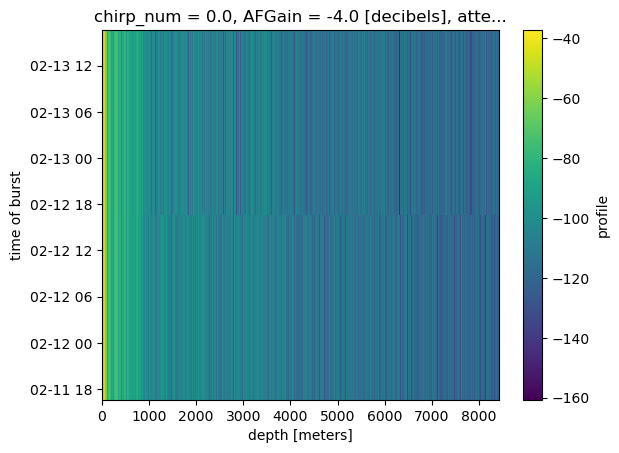

In [236]:
ds.profile.dB().isel(chirp_num = 0, attenuator_setting_pair=0).plot()

In [ ]:
directory='gs://ldeo-glaciology/GL_apres_2022/A101'
fs = xa.load.from_dats()
files = fs.list_files(directory)
import gcsfs
fs = gcsfs.GCSFileSystem()

fp = fs.open(files[100], 'r', encoding='latin-1')
fp



<_io.TextIOWrapper encoding='latin-1'>

In [ ]:
xarray_out = xr.Dataset(
                data_vars=dict(
                    chirp           = (["time","chirp_time", "chirp_num", "attenuator_setting_pair"], chirps),
                    latitude        = (["time"], [burst.Header['Latitude']]),
                    longitude       = (["time"], [burst.Header['Longitude']]),  
                    battery_voltage = (["time"], [burst.Header['BatteryVoltage']]), 
                    temperature_1   = (["time"], [burst.Header['Temp1']]),
                    temperature_2   = (["time"], [burst.Header['Temp2']])
                ),
                coords=dict(    
                    time                  = [time],
                    chirp_time            = chirp_time,
                    chirp_num             = np.arange(burst.Header['NSubBursts']),
                    filename              = (["time"], [burst.Filename]),
                    burst_number          = (["time"], [burst.BurstNo]),
                    AFGain                = (["attenuator_setting_pair"], burst.Header['AFGain'][0:burst.Header['nAttenuators']]),
                    attenuator            = (["attenuator_setting_pair"], burst.Header['Attenuator1'][0:burst.Header['nAttenuators']]),
                    orientation           = (["time"], [orientation])
                ),
            )

In [65]:
int(burst.header["N_ADC_SAMPLES"])

40001

In [68]:
np.arange(int(burst.header["N_ADC_SAMPLES"])) * int(burst.header["dt"])

KeyError: 'dt'

In [62]:
np.array(range(burst.header["N_ADC_SAMPLES"])) * burst.header["dt"]

TypeError: 'str' object cannot be interpreted as an integer

In [74]:
all(xapres_Loaded.chirp_time.values == np.linspace(start = 0, stop = 1, num = int(burst.header["N_ADC_SAMPLES"])))

True

In [78]:
f.fp

In [ ]:
import xarray as xr
class xapres(xr.Dataset):
    def __init__(self, file):
        self.file = file
        self.load()

    def load(self):
        self.data = xr.tutorial.load_dataset("air_temperature")

<frozen abc>:106: FutureWarning: xarray subclass xapres should explicitly define __slots__


In [115]:
xapres('../../data/sample/multi-burst-dat-file/')

/var/folders/kl/3mt9f4qs1559xwy3mr60s7980000gp/T/ipykernel_66438/395256186.py:4: FutureWarning: Setting attribute 'file' on a 'xapres' object. Explicitly define __slots__ to suppress this warning for legitimate custom attributes and raise an error when attempting variables assignments.
  self.file = file


RecursionError: maximum recursion depth exceeded while calling a Python object

In [155]:
import xarray as xr


@xr.register_dataarray_accessor("xapres")
class xapresAccessor:
    def __init__(self, xarray_obj):
        self._obj = xarray_obj
        self._center = None

    @property
    def center(self):
        """Return the geographic center point of this dataset."""
        #if self._center is None:
            # we can use a cache on our accessor objects, because accessors
            # themselves are cached on instances that access them.
            
            
           # lon = self._obj.latitude
           # lat = self._obj.longitude
           # self._center = (float(lon.mean()), float(lat.mean()))
        return self._obj.mean()

    def plot(self):
        """Plot data on a map."""
        return "plotting!"
    
    #@property
    def dB2(self):
        """
    A function to convert profile data to decibels.
    
    The function is added to xarray dataarrays as a bound method in two functions. 
    
    """
        return 20*np.log10(np.abs(self._obj)) 

/var/folders/kl/3mt9f4qs1559xwy3mr60s7980000gp/T/ipykernel_66438/3586655048.py:4: AccessorRegistrationWarning: registration of accessor <class '__main__.xapresAccessor'> under name 'xapres' for type <class 'xarray.core.dataarray.DataArray'> is overriding a preexisting attribute with the same name.
  @xr.register_dataarray_accessor("xapres")


In [143]:
xapres_Loaded = xa.load.load_zarr('gs://ldeo-glaciology/apres/thwaites/continuous/ApRES_LTG/zarr/full.zarr') #


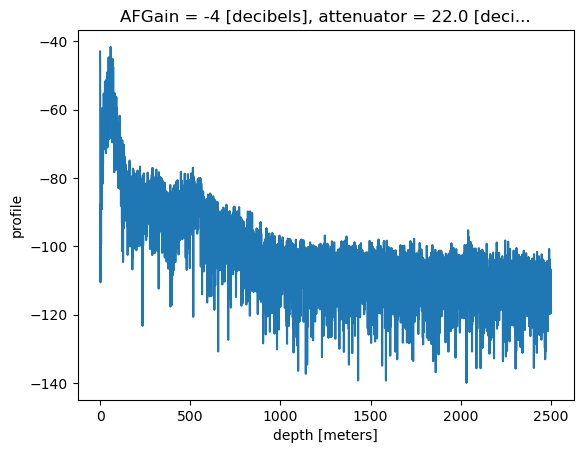

In [160]:
xapres_Loaded.isel(time=0, chirp_num=0).profile.xapres.dB2().plot()

In [145]:
xapres_Loaded.isel(time=0)

<xarray.Dataset>
Dimensions:          (attenuator_setting_pair: 1, chirp_time: 40001,
                      chirp_num: 100, profile_range: 11889)
Coordinates:
    AFGain           (attenuator_setting_pair) int64 dask.array<chunksize=(1,), meta=np.ndarray>
    attenuator       (attenuator_setting_pair) float64 dask.array<chunksize=(1,), meta=np.ndarray>
    burst_number     int64 dask.array<chunksize=(), meta=np.ndarray>
  * chirp_num        (chirp_num) int64 0 1 2 3 4 5 6 7 ... 93 94 95 96 97 98 99
  * chirp_time       (chirp_time) timedelta64[ns] 00:00:00 ... 00:00:01
    filename         <U90 dask.array<chunksize=(), meta=np.ndarray>
    orientation      <U7 dask.array<chunksize=(), meta=np.ndarray>
  * profile_range    (profile_range) float64 0.0 0.2103 ... 2.5e+03 2.5e+03
    time             datetime64[ns] 2023-01-16T00:52:00
Dimensions without coordinates: attenuator_setting_pair
Data variables:
    battery_voltage  float64 dask.array<chunksize=(), meta=np.ndarray>
    chirp            (chirp_time, chirp_num, attenuator_setting_pair) float64 dask.array<chunksize=(40001, 10, 1), meta=np.ndarray>
    chirp_stacked    (chirp_time, attenuator_setting_pair) float64 dask.array<chunksize=(40001, 1), meta=np.ndarray>
    latitude         float64 dask.array<chunksize=(), meta=np.ndarray>
    longitude        float64 dask.array<chunksize=(), meta=np.ndarray>
    profile          (chirp_num, attenuator_setting_pair, profile_range) complex128 dask.array<chunksize=(10, 1, 11889), meta=np.ndarray>
    profile_stacked  (attenuator_setting_pair, profile_range) complex128 dask.array<chunksize=(1, 11889), meta=np.ndarray>
    temperature_1    float64 dask.array<chunksize=(), meta=np.ndarray>
    temperature_2    float64 dask.array<chunksize=(), meta=np.ndarray>
Attributes:
    constants:   {'B': 200000000, 'K': 200000000.0, 'c': 300000000.0, 'dt': 2...
    processing:  Created on 2024-10-21 15:30:22.044429

In [ ]:
import xarray as xr




@xr.register_dataarray_accessor("xapres")
class xapresAccessor:
    def __init__(self, xarray_obj):
        self._obj = xarray_obj
       

    
    def load_dat(self):
        """Load data from a .dat file and return an xarray.dataset"""
        return 

    


    def dB(self):
        """
    A function to convert profile data to decibels.
    
    The function is added to xarray dataarrays as a bound method in two functions. 
    
    """
        return 20*np.log10(np.abs(self._obj)) 